In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics, model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


from sklearn.datasets import load_breast_cancer
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
Data = pd.read_csv('export_dataframe.csv')

FileNotFoundError: [Errno 2] File b'export_dataframe.csv' does not exist: b'export_dataframe.csv'

In [ ]:
Data = Data.sample(frac=1, random_state=420)

X = Data.iloc[:, 0:72]
y = Data.iloc[:, 72]

In [4]:
def run_classifier(clf, name, X_train, X_test, y_train, y_test, num_tests=100):
    metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1': []}
    
    for n in range(num_tests):
        clf.fit(X_train, y_train)    ## Entrenamos con X_train y clases y_train
        predictions = clf.predict(X_test)
        metrics['y_pred'] = predictions
        #metrics['y_prob'] = clf.predict_proba(X_test)[:,1]
        metrics['Accuracy'].append(accuracy_score(y_test, predictions))
        metrics['Precision'].append(precision_score(y_test, predictions,average='macro'))
        metrics['Recall'].append(recall_score(y_test, predictions,average='macro'))
        metrics['F1'].append(f1_score(y_test, predictions,average='macro'))
        if n == 0:
            plot_confusion_matrix(y_test, predictions, classes=["cyl", "hook", "lat", "palm", "spher", "tip"], title='Confusion matrix ' + name)
            
    
    return metrics

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred) 
    
    # Only use the labels that appear in the data
   
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

----------------
Resultados para clasificador:  Base Dummy
Accuracy promedio: 0.15925925925925924
Precision promedio: 0.1592451379447684
Recall promedio: 0.15925925925925924
F1 promedio: 0.15908272514266505
----------------


----------------
Resultados para clasificador:  Decision Tree
Accuracy promedio: 0.4068518518518519
Precision promedio: 0.40834313265332656
Recall promedio: 0.4068518518518519
F1 promedio: 0.4072945372392621
----------------


----------------
Resultados para clasificador:  Gaussian Naive Bayes
Accuracy promedio: 0.4805555555555555
Precision promedio: 0.49573530633763613
Recall promedio: 0.4805555555555555
F1 promedio: 0.475075325291593
----------------


----------------
Resultados para clasificador:  KNN
Accuracy promedio: 0.5018518518518518
Precision promedio: 0.572278081758687
Recall promedio: 0.5018518518518518
F1 promedio: 0.5066896181959943
----------------


----------------
Resultados para clasificador:  Support Vector Machine
Accuracy promedio: 0.5481481

C:\Users\vicen\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vicen\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vicen\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vicen\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

----------------
Resultados para clasificador:  MLP
Accuracy promedio: 0.6867592592592593
Precision promedio: 0.6873550965367918
Recall promedio: 0.6867592592592592
F1 promedio: 0.6866204798793067
----------------


----------------
Resultados para clasificador:  Random Forest
Accuracy promedio: 0.6398148148148148
Precision promedio: 0.637085529867502
Recall promedio: 0.6398148148148148
F1 promedio: 0.6372198912562458
----------------




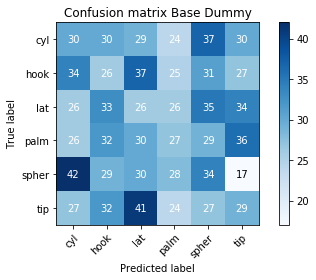

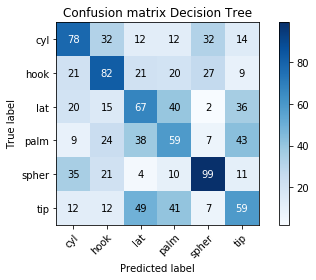

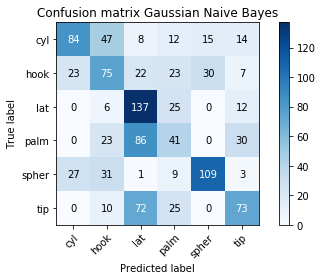

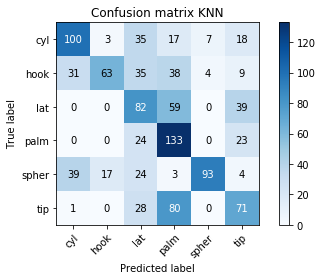

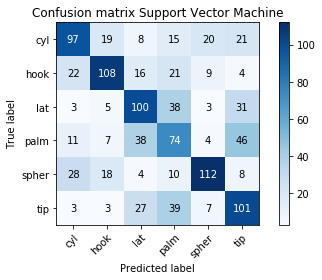

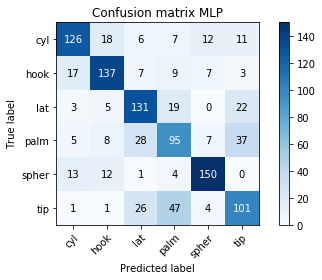

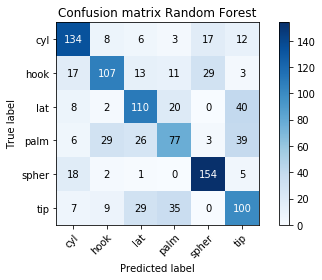

In [5]:
pickle_in= open("output.pickle","rb")
Xc=pickle.load(pickle_in)
pickle_in= open("Y.pickle","rb")
Yc=pickle.load(pickle_in)
X_train, X_test, y_train, y_test = train_test_split(Xc, Yc, test_size=.4, random_state=420, stratify=Yc)

c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
c1 = ("Decision Tree", DecisionTreeClassifier())
c2 = ("Gaussian Naive Bayes", GaussianNB())
c3 = ("KNN", KNeighborsClassifier(n_neighbors=5))
#c4 = ("Support Vector Machine", SVC(kernel='linear', gamma='auto'))
c4 = ("Support Vector Machine", LinearSVC(max_iter=3000))
c5 = ("MLP", MLPClassifier())
c6 = ("Random Forest", RandomForestClassifier(n_estimators=100))

classifiers = [c0,c1, c2, c3, c4, c5,c6]

results = {}
for name, clf in classifiers:
    metrics = run_classifier(clf, name, X_train, X_test, y_train, y_test, 10) 
    results[name] = metrics
    print("----------------")
    print("Resultados para clasificador: ",name) 
    print("Accuracy promedio:",np.array(metrics['Accuracy']).mean())
    print("Precision promedio:",np.array(metrics['Precision']).mean())
    print("Recall promedio:",np.array(metrics['Recall']).mean())
    print("F1 promedio:",np.array(metrics['F1']).mean())
    print("----------------\n\n")